## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras
import itertools

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
"""
建立神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.7, 0.9, 0.95, 0.99]

In [7]:
results = {}
for lr, momentum in itertools.product(LEARNING_RATE, MOMENTUM):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f, Momentum = %.2f" % (lr, momentum))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=momentum)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s-momemtum-%s" % (str(lr), str(momentum))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.100000, Momentum = 0.70
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Instructions 

Epoch 48/50
50000/50000 [==============================] - 1s 25us/step - loss: 0.7636 - acc: 0.7265 - val_loss: 2.0030 - val_acc: 0.4614
Epoch 49/50
50000/50000 [==============================] - 1s 28us/step - loss: 0.7309 - acc: 0.7356 - val_loss: 1.8140 - val_acc: 0.4961
Epoch 50/50
50000/50000 [==============================] - 1s 25us/step - loss: 0.7232 - acc: 0.7371 - val_loss: 1.9220 - val_acc: 0.4954
Experiment with LR = 0.100000, Momentum = 0.90
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_laye

50000/50000 [==============================] - 1s 26us/step - loss: 2.3036 - acc: 0.0974 - val_loss: 2.3036 - val_acc: 0.1000
Epoch 50/50
50000/50000 [==============================] - 1s 24us/step - loss: 2.3033 - acc: 0.1014 - val_loss: 2.3035 - val_acc: 0.1000
Experiment with LR = 0.100000, Momentum = 0.95
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               

50000/50000 [==============================] - 1s 23us/step - loss: 2.3042 - acc: 0.0992 - val_loss: 2.3053 - val_acc: 0.1000
Experiment with LR = 0.100000, Momentum = 0.99
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________

Experiment with LR = 0.010000, Momentum = 0.70
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 1s 27us/step - loss: 1.8650 - acc: 0.3306 - val_loss: 1.7301 - val_acc: 0.3792
Epoch 2/50
50000/50000 [==============================] - 1s 24us/step - loss: 1.6442 - acc: 0.4164 - val_loss: 1.6500 - val_acc: 0.4154
Epoch 3/50
50000/50000 [==============================] - 1s 23us/step - loss: 1.5548 - acc: 0.4493 - val_loss: 1.5298 - val_acc: 0.4539
Epoch 4/50
50000/50000 [==============================] - 1s 24us/step - loss: 1.4914 - acc: 0.4728 - val_loss: 1.5603 - val_acc: 0.4375
Epoch 5/50
50000/50000 [==============================] - 1s 23us/step - loss: 1.4424 - acc: 0.4891 - val_loss: 1.5463 - val_acc: 0.4434
Epoch 6/50
50000/50000 [==============================] - 1s 23us/step - loss: 1.4005 - acc: 0.5055 - val_loss: 1.4327 - val_acc: 0.4903
Epoch 7/50
50000/50000 [==============================] - 1s 23us/step - loss: 1.3609 - acc: 0.5189 - val_loss: 1.4601 - val_acc

50000/50000 [==============================] - 1s 23us/step - loss: 1.6048 - acc: 0.4302 - val_loss: 1.5952 - val_acc: 0.4357
Epoch 3/50
50000/50000 [==============================] - 1s 24us/step - loss: 1.5143 - acc: 0.4622 - val_loss: 1.5275 - val_acc: 0.4535
Epoch 4/50
50000/50000 [==============================] - 1s 24us/step - loss: 1.4594 - acc: 0.4817 - val_loss: 1.4774 - val_acc: 0.4734
Epoch 5/50
50000/50000 [==============================] - 1s 24us/step - loss: 1.4066 - acc: 0.5020 - val_loss: 1.5058 - val_acc: 0.4701
Epoch 6/50
50000/50000 [==============================] - 1s 24us/step - loss: 1.3568 - acc: 0.5171 - val_loss: 1.5115 - val_acc: 0.4687
Epoch 7/50
50000/50000 [==============================] - 1s 24us/step - loss: 1.3244 - acc: 0.5288 - val_loss: 1.4379 - val_acc: 0.4883
Epoch 8/50
50000/50000 [==============================] - 1s 24us/step - loss: 1.2858 - acc: 0.5412 - val_loss: 1.3910 - val_acc: 0.4978
Epoch 9/50
50000/50000 [============================

50000/50000 [==============================] - 1s 24us/step - loss: 1.5130 - acc: 0.4611 - val_loss: 1.5217 - val_acc: 0.4577
Epoch 4/50
50000/50000 [==============================] - 1s 24us/step - loss: 1.4632 - acc: 0.4782 - val_loss: 1.4687 - val_acc: 0.4735
Epoch 5/50
50000/50000 [==============================] - 1s 24us/step - loss: 1.4159 - acc: 0.4956 - val_loss: 1.4804 - val_acc: 0.4758
Epoch 6/50
50000/50000 [==============================] - 1s 24us/step - loss: 1.3896 - acc: 0.5018 - val_loss: 1.4470 - val_acc: 0.4903
Epoch 7/50
50000/50000 [==============================] - 1s 24us/step - loss: 1.3509 - acc: 0.5189 - val_loss: 1.5339 - val_acc: 0.4667
Epoch 8/50
50000/50000 [==============================] - 1s 24us/step - loss: 1.3408 - acc: 0.5197 - val_loss: 1.4446 - val_acc: 0.4836
Epoch 9/50
50000/50000 [==============================] - 1s 24us/step - loss: 1.3148 - acc: 0.5297 - val_loss: 1.4288 - val_acc: 0.4883
Epoch 10/50
50000/50000 [===========================

50000/50000 [==============================] - 1s 24us/step - loss: 1.8980 - acc: 0.3334 - val_loss: 1.8818 - val_acc: 0.3329
Epoch 5/50
50000/50000 [==============================] - 1s 24us/step - loss: 1.8607 - acc: 0.3484 - val_loss: 1.8489 - val_acc: 0.3585
Epoch 6/50
50000/50000 [==============================] - 1s 23us/step - loss: 1.8315 - acc: 0.3577 - val_loss: 1.8222 - val_acc: 0.3638
Epoch 7/50
50000/50000 [==============================] - 1s 24us/step - loss: 1.8075 - acc: 0.3674 - val_loss: 1.7987 - val_acc: 0.3691
Epoch 8/50
50000/50000 [==============================] - 1s 24us/step - loss: 1.7861 - acc: 0.3742 - val_loss: 1.7810 - val_acc: 0.3726
Epoch 9/50
50000/50000 [==============================] - 1s 24us/step - loss: 1.7676 - acc: 0.3827 - val_loss: 1.7624 - val_acc: 0.3846
Epoch 10/50
50000/50000 [==============================] - 1s 24us/step - loss: 1.7503 - acc: 0.3868 - val_loss: 1.7426 - val_acc: 0.3937
Epoch 11/50
50000/50000 [==========================

50000/50000 [==============================] - 1s 24us/step - loss: 1.7060 - acc: 0.4022 - val_loss: 1.6946 - val_acc: 0.4092
Epoch 6/50
50000/50000 [==============================] - 1s 24us/step - loss: 1.6730 - acc: 0.4154 - val_loss: 1.6773 - val_acc: 0.4091
Epoch 7/50
50000/50000 [==============================] - 1s 24us/step - loss: 1.6432 - acc: 0.4255 - val_loss: 1.6455 - val_acc: 0.4255
Epoch 8/50
50000/50000 [==============================] - 1s 24us/step - loss: 1.6162 - acc: 0.4335 - val_loss: 1.6164 - val_acc: 0.4281
Epoch 9/50
50000/50000 [==============================] - 1s 24us/step - loss: 1.5924 - acc: 0.4421 - val_loss: 1.5961 - val_acc: 0.4377
Epoch 10/50
50000/50000 [==============================] - 1s 24us/step - loss: 1.5721 - acc: 0.4492 - val_loss: 1.5906 - val_acc: 0.4437
Epoch 11/50
50000/50000 [==============================] - 1s 24us/step - loss: 1.5519 - acc: 0.4568 - val_loss: 1.5654 - val_acc: 0.4484
Epoch 12/50
50000/50000 [=========================

50000/50000 [==============================] - 1s 24us/step - loss: 1.5790 - acc: 0.4458 - val_loss: 1.5787 - val_acc: 0.4395
Epoch 7/50
50000/50000 [==============================] - 1s 24us/step - loss: 1.5425 - acc: 0.4576 - val_loss: 1.5519 - val_acc: 0.4539
Epoch 8/50
50000/50000 [==============================] - 1s 24us/step - loss: 1.5126 - acc: 0.4682 - val_loss: 1.5237 - val_acc: 0.4665
Epoch 9/50
50000/50000 [==============================] - 1s 24us/step - loss: 1.4841 - acc: 0.4783 - val_loss: 1.5089 - val_acc: 0.4641
Epoch 10/50
50000/50000 [==============================] - 1s 24us/step - loss: 1.4578 - acc: 0.4860 - val_loss: 1.4825 - val_acc: 0.4756
Epoch 11/50
50000/50000 [==============================] - 1s 24us/step - loss: 1.4322 - acc: 0.4984 - val_loss: 1.4905 - val_acc: 0.4711
Epoch 12/50
50000/50000 [==============================] - 1s 24us/step - loss: 1.4087 - acc: 0.5050 - val_loss: 1.4581 - val_acc: 0.4842
Epoch 13/50
50000/50000 [========================

50000/50000 [==============================] - 1s 24us/step - loss: 1.3693 - acc: 0.5148 - val_loss: 1.4374 - val_acc: 0.4925
Epoch 8/50
50000/50000 [==============================] - 1s 24us/step - loss: 1.3343 - acc: 0.5273 - val_loss: 1.4055 - val_acc: 0.5039
Epoch 9/50
50000/50000 [==============================] - 1s 24us/step - loss: 1.3057 - acc: 0.5371 - val_loss: 1.3974 - val_acc: 0.5060
Epoch 10/50
50000/50000 [==============================] - 1s 24us/step - loss: 1.2772 - acc: 0.5473 - val_loss: 1.3957 - val_acc: 0.5119
Epoch 11/50
50000/50000 [==============================] - 1s 23us/step - loss: 1.2441 - acc: 0.5602 - val_loss: 1.3596 - val_acc: 0.5158
Epoch 12/50
50000/50000 [==============================] - 1s 23us/step - loss: 1.2201 - acc: 0.5686 - val_loss: 1.3652 - val_acc: 0.5178
Epoch 13/50
50000/50000 [==============================] - 1s 24us/step - loss: 1.2023 - acc: 0.5746 - val_loss: 1.3564 - val_acc: 0.5209
Epoch 14/50
50000/50000 [=======================

50000/50000 [==============================] - 1s 24us/step - loss: 2.1298 - acc: 0.2385 - val_loss: 2.1218 - val_acc: 0.2409
Epoch 9/50
50000/50000 [==============================] - 1s 24us/step - loss: 2.1153 - acc: 0.2438 - val_loss: 2.1077 - val_acc: 0.2505
Epoch 10/50
50000/50000 [==============================] - 1s 24us/step - loss: 2.1014 - acc: 0.2506 - val_loss: 2.0941 - val_acc: 0.2538
Epoch 11/50
50000/50000 [==============================] - 1s 24us/step - loss: 2.0880 - acc: 0.2545 - val_loss: 2.0811 - val_acc: 0.2580
Epoch 12/50
50000/50000 [==============================] - 1s 24us/step - loss: 2.0751 - acc: 0.2615 - val_loss: 2.0685 - val_acc: 0.2629
Epoch 13/50
50000/50000 [==============================] - 1s 24us/step - loss: 2.0627 - acc: 0.2668 - val_loss: 2.0566 - val_acc: 0.2663
Epoch 14/50
50000/50000 [==============================] - 1s 23us/step - loss: 2.0511 - acc: 0.2717 - val_loss: 2.0455 - val_acc: 0.2687
Epoch 15/50
50000/50000 [======================

50000/50000 [==============================] - 1s 24us/step - loss: 1.9193 - acc: 0.3273 - val_loss: 1.9139 - val_acc: 0.3270
Epoch 10/50
50000/50000 [==============================] - 1s 24us/step - loss: 1.9040 - acc: 0.3320 - val_loss: 1.8995 - val_acc: 0.3344
Epoch 11/50
50000/50000 [==============================] - 1s 24us/step - loss: 1.8902 - acc: 0.3371 - val_loss: 1.8871 - val_acc: 0.3383
Epoch 12/50
50000/50000 [==============================] - 1s 24us/step - loss: 1.8780 - acc: 0.3416 - val_loss: 1.8763 - val_acc: 0.3371
Epoch 13/50
50000/50000 [==============================] - 1s 24us/step - loss: 1.8673 - acc: 0.3449 - val_loss: 1.8654 - val_acc: 0.3405
Epoch 14/50
50000/50000 [==============================] - 1s 24us/step - loss: 1.8573 - acc: 0.3486 - val_loss: 1.8563 - val_acc: 0.3452
Epoch 15/50
50000/50000 [==============================] - 1s 24us/step - loss: 1.8479 - acc: 0.3510 - val_loss: 1.8478 - val_acc: 0.3493
Epoch 16/50
50000/50000 [=====================

50000/50000 [==============================] - 1s 24us/step - loss: 1.8169 - acc: 0.3695 - val_loss: 1.8116 - val_acc: 0.3735
Epoch 11/50
50000/50000 [==============================] - 1s 24us/step - loss: 1.8024 - acc: 0.3749 - val_loss: 1.7983 - val_acc: 0.3791
Epoch 12/50
50000/50000 [==============================] - 1s 24us/step - loss: 1.7890 - acc: 0.3802 - val_loss: 1.7852 - val_acc: 0.3820
Epoch 13/50
50000/50000 [==============================] - 1s 23us/step - loss: 1.7769 - acc: 0.3834 - val_loss: 1.7756 - val_acc: 0.3837
Epoch 14/50
50000/50000 [==============================] - 1s 23us/step - loss: 1.7654 - acc: 0.3883 - val_loss: 1.7630 - val_acc: 0.3909
Epoch 15/50
50000/50000 [==============================] - 1s 24us/step - loss: 1.7546 - acc: 0.3922 - val_loss: 1.7534 - val_acc: 0.3931
Epoch 16/50
50000/50000 [==============================] - 1s 23us/step - loss: 1.7448 - acc: 0.3948 - val_loss: 1.7447 - val_acc: 0.3974
Epoch 17/50
50000/50000 [=====================

50000/50000 [==============================] - 1s 24us/step - loss: 1.5942 - acc: 0.4411 - val_loss: 1.5931 - val_acc: 0.4367
Epoch 12/50
50000/50000 [==============================] - 1s 24us/step - loss: 1.5729 - acc: 0.4496 - val_loss: 1.5770 - val_acc: 0.4455
Epoch 13/50
50000/50000 [==============================] - 1s 24us/step - loss: 1.5559 - acc: 0.4559 - val_loss: 1.5665 - val_acc: 0.4497
Epoch 14/50
50000/50000 [==============================] - 1s 24us/step - loss: 1.5393 - acc: 0.4624 - val_loss: 1.5523 - val_acc: 0.4505
Epoch 15/50
50000/50000 [==============================] - 1s 24us/step - loss: 1.5237 - acc: 0.4686 - val_loss: 1.5403 - val_acc: 0.4571
Epoch 16/50
50000/50000 [==============================] - 1s 24us/step - loss: 1.5098 - acc: 0.4697 - val_loss: 1.5314 - val_acc: 0.4603
Epoch 17/50
50000/50000 [==============================] - 1s 24us/step - loss: 1.4959 - acc: 0.4749 - val_loss: 1.5165 - val_acc: 0.4614
Epoch 18/50
50000/50000 [=====================

50000/50000 [==============================] - 1s 24us/step - loss: 2.2777 - acc: 0.1308 - val_loss: 2.2768 - val_acc: 0.1374
Epoch 13/50
50000/50000 [==============================] - 1s 25us/step - loss: 2.2736 - acc: 0.1358 - val_loss: 2.2729 - val_acc: 0.1425
Epoch 14/50
50000/50000 [==============================] - 1s 24us/step - loss: 2.2697 - acc: 0.1410 - val_loss: 2.2691 - val_acc: 0.1489
Epoch 15/50
50000/50000 [==============================] - 1s 24us/step - loss: 2.2661 - acc: 0.1462 - val_loss: 2.2656 - val_acc: 0.1518
Epoch 16/50
50000/50000 [==============================] - 1s 24us/step - loss: 2.2626 - acc: 0.1502 - val_loss: 2.2622 - val_acc: 0.1559
Epoch 17/50
50000/50000 [==============================] - 1s 24us/step - loss: 2.2593 - acc: 0.1536 - val_loss: 2.2590 - val_acc: 0.1581
Epoch 18/50
50000/50000 [==============================] - 1s 24us/step - loss: 2.2562 - acc: 0.1572 - val_loss: 2.2559 - val_acc: 0.1635
Epoch 19/50
50000/50000 [=====================

50000/50000 [==============================] - 1s 24us/step - loss: 2.2105 - acc: 0.2168 - val_loss: 2.2075 - val_acc: 0.2179
Epoch 14/50
50000/50000 [==============================] - 1s 24us/step - loss: 2.2044 - acc: 0.2218 - val_loss: 2.2014 - val_acc: 0.2210
Epoch 15/50
50000/50000 [==============================] - 1s 23us/step - loss: 2.1984 - acc: 0.2263 - val_loss: 2.1955 - val_acc: 0.2254
Epoch 16/50
50000/50000 [==============================] - 1s 23us/step - loss: 2.1925 - acc: 0.2309 - val_loss: 2.1896 - val_acc: 0.2295
Epoch 17/50
50000/50000 [==============================] - 1s 23us/step - loss: 2.1867 - acc: 0.2343 - val_loss: 2.1838 - val_acc: 0.2330
Epoch 18/50
50000/50000 [==============================] - 1s 24us/step - loss: 2.1810 - acc: 0.2379 - val_loss: 2.1780 - val_acc: 0.2363
Epoch 19/50
50000/50000 [==============================] - 1s 23us/step - loss: 2.1752 - acc: 0.2401 - val_loss: 2.1722 - val_acc: 0.2408
Epoch 20/50
50000/50000 [=====================

50000/50000 [==============================] - 1s 24us/step - loss: 2.1311 - acc: 0.2465 - val_loss: 2.1273 - val_acc: 0.2548
Epoch 15/50
50000/50000 [==============================] - 1s 24us/step - loss: 2.1224 - acc: 0.2501 - val_loss: 2.1188 - val_acc: 0.2580
Epoch 16/50
50000/50000 [==============================] - 1s 24us/step - loss: 2.1141 - acc: 0.2545 - val_loss: 2.1108 - val_acc: 0.2638
Epoch 17/50
50000/50000 [==============================] - 1s 24us/step - loss: 2.1060 - acc: 0.2580 - val_loss: 2.1030 - val_acc: 0.2673
Epoch 18/50
50000/50000 [==============================] - 1s 24us/step - loss: 2.0983 - acc: 0.2623 - val_loss: 2.0955 - val_acc: 0.2707
Epoch 19/50
50000/50000 [==============================] - 1s 24us/step - loss: 2.0907 - acc: 0.2651 - val_loss: 2.0881 - val_acc: 0.2732
Epoch 20/50
50000/50000 [==============================] - 1s 24us/step - loss: 2.0834 - acc: 0.2687 - val_loss: 2.0810 - val_acc: 0.2758
Epoch 21/50
50000/50000 [=====================

50000/50000 [==============================] - 1s 24us/step - loss: 1.8727 - acc: 0.3460 - val_loss: 1.8689 - val_acc: 0.3481
Epoch 16/50
50000/50000 [==============================] - 1s 24us/step - loss: 1.8624 - acc: 0.3506 - val_loss: 1.8598 - val_acc: 0.3490
Epoch 17/50
50000/50000 [==============================] - 1s 24us/step - loss: 1.8535 - acc: 0.3548 - val_loss: 1.8519 - val_acc: 0.3496
Epoch 18/50
50000/50000 [==============================] - 1s 24us/step - loss: 1.8458 - acc: 0.3561 - val_loss: 1.8443 - val_acc: 0.3532
Epoch 19/50
50000/50000 [==============================] - 1s 24us/step - loss: 1.8373 - acc: 0.3593 - val_loss: 1.8362 - val_acc: 0.3589
Epoch 20/50
50000/50000 [==============================] - 1s 24us/step - loss: 1.8301 - acc: 0.3618 - val_loss: 1.8293 - val_acc: 0.3604
Epoch 21/50
50000/50000 [==============================] - 1s 24us/step - loss: 1.8230 - acc: 0.3634 - val_loss: 1.8229 - val_acc: 0.3645
Epoch 22/50
50000/50000 [=====================

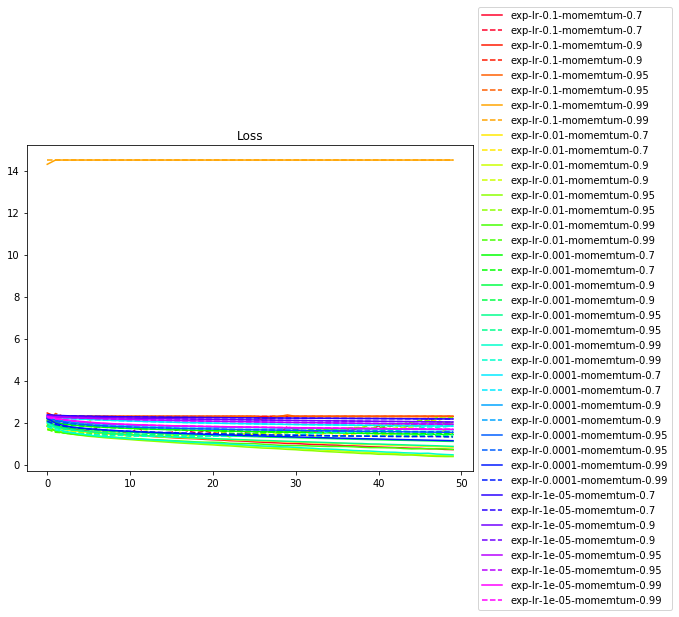

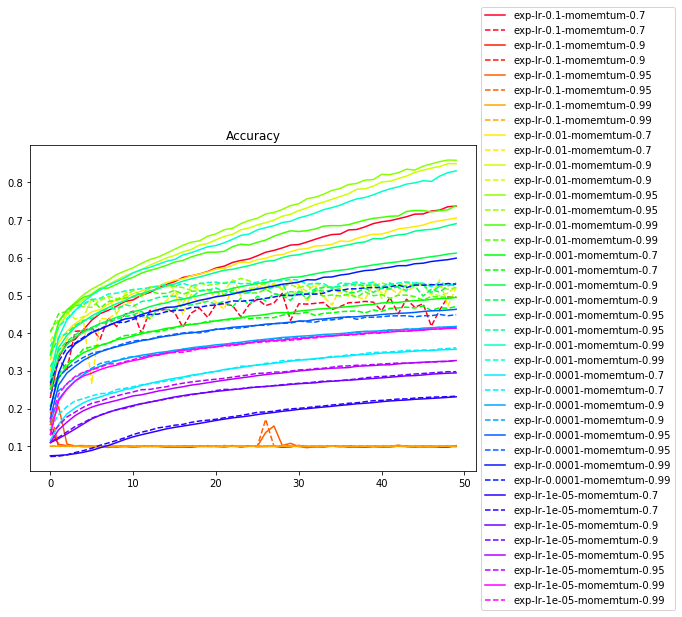

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline 
    
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()